In [4]:
# Importation des packages et fonctions principales
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
import collections

## Exercice 2 : 

Dans cet exercice nous allons travailler sur une problématique de classification visant à reconnaître une propriété
d’une bactérie à partir d’une matrice de descripteurs. 

### 1.

Nous allons commencer par regarder les données : 

In [5]:
data = pd.read_table("train-data.txt", sep=" ", header=0)
datatest = pd.read_table("test-data.txt", sep=" ", header=0)
data

,Gram,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240
0,NEG,0.058753,0.057243,0.050666,0.054601,0.051106,0.054563,0.052369,0.049727,0.048300,...,0.058277,0.060221,0.057840,0.058580,0.058319,0.061119,0.057462,0.058557,0.062106,0.059730
1,NEG,0.047111,0.052490,0.051228,0.052810,0.053670,0.049795,0.049764,0.047964,0.050901,...,0.062517,0.061925,0.059166,0.058579,0.060245,0.060575,0.060001,0.058751,0.059924,0.061063
2,NEG,0.048959,0.058325,0.042828,0.053562,0.052253,0.051208,0.048307,0.051011,0.046705,...,0.060503,0.059426,0.061838,0.057495,0.062276,0.056551,0.061512,0.061728,0.062117,0.059941
3,NEG,0.056847,0.054794,0.049040,0.057075,0.047005,0.052528,0.049503,0.050500,0.050235,...,0.060669,0.061445,0.062393,0.059454,0.058955,0.060038,0.060401,0.057667,0.060647,0.061984
4,NEG,0.053074,0.045115,0.044600,0.050904,0.048808,0.051350,0.049644,0.045842,0.048229,...,0.061864,0.060919,0.059285,0.060180,0.059578,0.061590,0.061065,0.059392,0.059572,0.060539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,POS,0.040862,0.044109,0.046752,0.043077,0.049439,0.044183,0.046734,0.047247,0.047064,...,0.071364,0.069699,0.072249,0.069303,0.069920,0.069733,0.068957,0.071005,0.069936,0.070959
2399,POS,0.063200,0.069162,0.064695,0.067147,0.069054,0.062134,0.070646,0.063330,0.064303,...,0.064865,0.065829,0.066260,0.067313,0.067352,0.066286,0.067840,0.067131,0.066911,0.066354
2400,POS,0.060648,0.058785,0.060071,0.061500,0.059259,0.061260,0.056183,0.063600,0.054492,...,0.067842,0.064525,0.066653,0.067271,0.066238,0.067606,0.066958,0.066593,0.065287,0.066740
2401,POS,0.059543,0.051692,0.054257,0.060780,0.055261,0.060040,0.057628,0.058231,0.055075,...,0.070739,0.070831,0.070914,0.069332,0.070945,0.070379,0.071921,0.071739,0.069064,0.071852


On peut voir ici que la première colonne contient les informations concernant la propriété 'Gram' de la bactérie. Cette informatin est importante dans le domaine médicale par exemple, car la résistance des bactéries et l'efficacité des antibiotiques dépendent du type de bactérie. Dans les autres colonnes, on voit des valeurs de 'features' des gènes. 

On va maintenant représenter les features des bactéries en fonction des type de bactéries. 

In [3]:
#col = data.Gram
#for i in range(len(data.Gram)):
 #   if data.Gram[i] == "NEG":
 #       col[i] = "red"
 #   else:
 #       col[i] = "blue"

#data.plot(color = col)

On va maintenant voir s'il existe des différences sur ces données. 

In [6]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240
count,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,...,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000
mean,0.047570,0.047884,0.048231,0.048175,0.048024,0.047503,0.046707,0.045812,0.044950,0.043844,...,0.072823,0.072663,0.072458,0.072222,0.072137,0.072056,0.072028,0.071936,0.071853,0.071681
std,0.009657,0.009319,0.009179,0.008812,0.008551,0.008223,0.007776,0.007354,0.007106,0.006836,...,0.008287,0.008323,0.008272,0.008234,0.008240,0.008181,0.008142,0.008049,0.008047,0.008048
min,0.015114,0.017491,0.016919,0.022140,0.024088,0.024161,0.025632,0.026245,0.024983,0.024653,...,0.046791,0.046412,0.047839,0.047051,0.047247,0.047513,0.047566,0.046938,0.046515,0.047470
25%,0.041200,0.041605,0.041741,0.042180,0.042153,0.041766,0.041246,0.040698,0.039977,0.039166,...,0.066821,0.066552,0.066394,0.066148,0.066207,0.066108,0.066139,0.066161,0.066084,0.065857
50%,0.047150,0.047620,0.047925,0.047874,0.047578,0.046879,0.046256,0.045464,0.044429,0.043371,...,0.071572,0.071567,0.071313,0.071047,0.071090,0.071004,0.070990,0.070849,0.070710,0.070559
75%,0.053889,0.053704,0.054217,0.053827,0.053740,0.053059,0.051659,0.050510,0.049369,0.048128,...,0.077477,0.077425,0.077169,0.076936,0.076766,0.076642,0.076559,0.076516,0.076278,0.076265
max,0.083199,0.079429,0.080889,0.087333,0.081704,0.079412,0.078034,0.076380,0.074481,0.068391,...,0.098727,0.099649,0.102033,0.100595,0.100046,0.101143,0.100907,0.098476,0.100069,0.100099


Il semblerait que les informations présentes dans les 'features' ne sont pas très différentes les unes des autres. En effet, On peut voir que la moyenne de toutes les features représentées est compris entre 0.04 et 0.073, l'écart type ne varit pas beaucoupe non plus. Essayons donc de faire une ACP de ces données car elle devrait permettre de voir plus d'informations.

In [7]:
# On sépare les données de train et test et on sépare les données à prédire et les données prédictives
Y_train = data.Gram
X_train = data.drop(columns = 'Gram')
X_test = datatest
#Y_test = Y_train.tail(403)
#Y_train = Y_train.head(2000)

# On fait l'ACP
X_train = StandardScaler().fit_transform(X_train)
res_acp = PCA(n_components=10)
principalComponents = res_acp.fit_transform(X_train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'
                         , 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'
                         , 'principal component 9', 'principal component 10'])

finalDf = pd.concat([principalDf, Y_train], axis = 1)

In [8]:
# Répartition des types de bactérie
Y_train.value_counts()/len(Y_train)

NEG    0.765293
POS    0.234707
Name: Gram, dtype: float64

On a donc presque la même proportion devaleur "NEG" et "POS" dans les données de test et de validation. Il n'est donc pas nécessaire de faire 'sample = np.random.choice(range(2403), size=2000, replace=False, p=None)' pour récupérer des données aléatoirement. On va maintenant voir le pourcentage de variance expliquées par les premiers axes : 

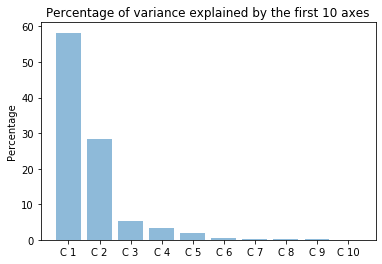

In [9]:
PourcentVarAxes = res_acp.explained_variance_ratio_ * 100

objects = ('C 1', 'C 2', 'C 3', 'C 4', 'C 5', 'C 6', 'C 7', 'C 8', 'C 9', 'C 10')
y_pos = np.arange(len(objects))

plt.bar(y_pos, PourcentVarAxes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Percentage of variance explained by the first 10 axes')

plt.show()

On voit que les 4 premières composantes principales expliquent presque totalement le nuage de point. 

In [10]:
print('Pourcentage de variance expliquée par les quatre premiers axes : %0.4f pour cent.' % PourcentVarAxes[0:4].sum())

Pourcentage de variance expliquée par les quatre premiers axes : 95.1648 pour cent.


On représente maintenant les quatres premiers axes

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Gram
0,-16.770753,-5.214201,1.991294,-0.456536,0.126353,-1.377722,1.330164,-0.105971,0.060855,-0.136995,NEG
1,-15.921400,-4.003509,2.210009,0.095162,0.115364,-1.007407,1.234955,-0.118458,0.298459,-0.457225,NEG
2,-14.990595,-3.170369,2.786617,0.060718,0.333934,-1.178977,0.872277,-0.224049,-0.131723,-0.238410,NEG
3,-16.444756,-4.099731,2.646585,-0.370974,0.382143,-1.459407,0.977074,-0.043128,0.100333,-0.256296,NEG
4,-15.139477,-2.007762,3.334403,0.991092,-0.241688,-1.670994,0.645553,-0.320684,0.174426,-0.586454,NEG
...,...,...,...,...,...,...,...,...,...,...,...
2398,-3.824572,-6.635846,-3.538689,2.778712,1.216291,2.199579,-1.267050,0.053038,-0.268260,-0.292613,POS
2399,-8.722833,-11.625413,-6.306003,-2.740917,0.050827,-0.697038,-1.119417,-0.246852,-0.066624,-0.078391,POS
2400,-10.435452,-8.085156,-5.975553,-0.640672,-0.023612,0.435017,-1.042726,0.040273,0.953012,0.608510,POS
2401,-4.011461,-7.694286,-7.632653,-1.301050,1.936199,1.791355,-0.966076,-0.978037,0.075481,-0.268040,POS


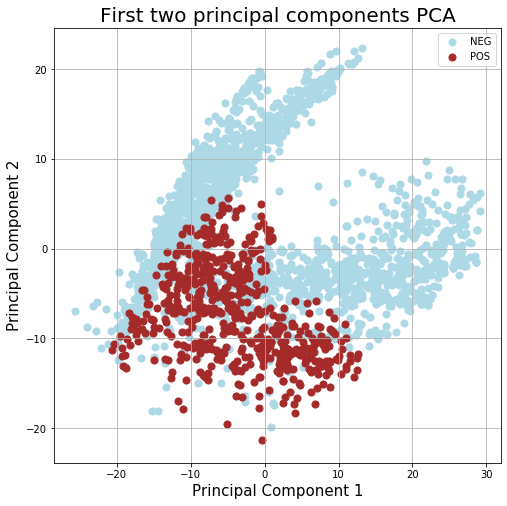

In [61]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('First two principal components PCA', fontsize = 20)
targets = ['NEG', 'POS']
colors = ['lightblue', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gram'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

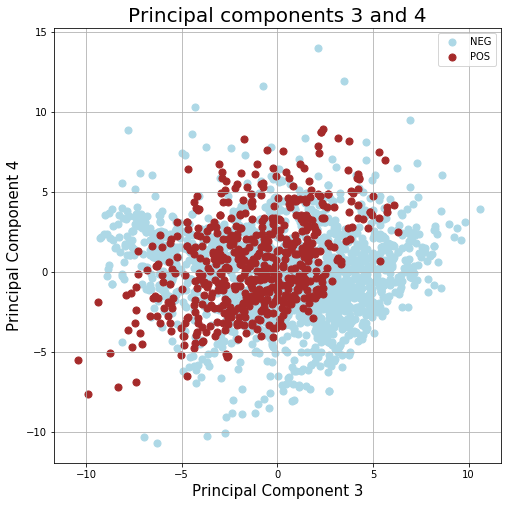

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('Principal components 3 and 4', fontsize = 20)
targets = ['NEG', 'POS']
colors = ['lightblue', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gram'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

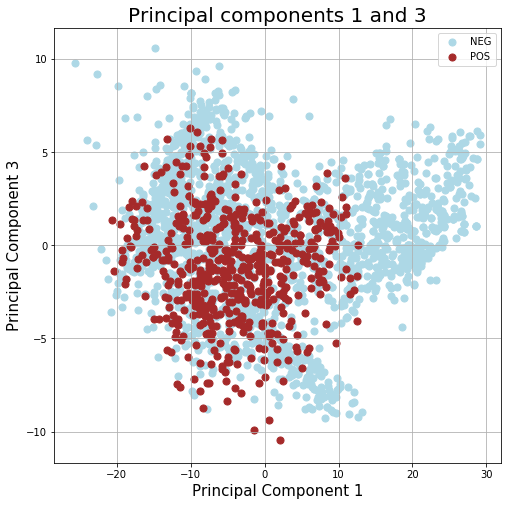

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('Principal components 1 and 3', fontsize = 20)
targets = ['NEG', 'POS']
colors = ['lightblue', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gram'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

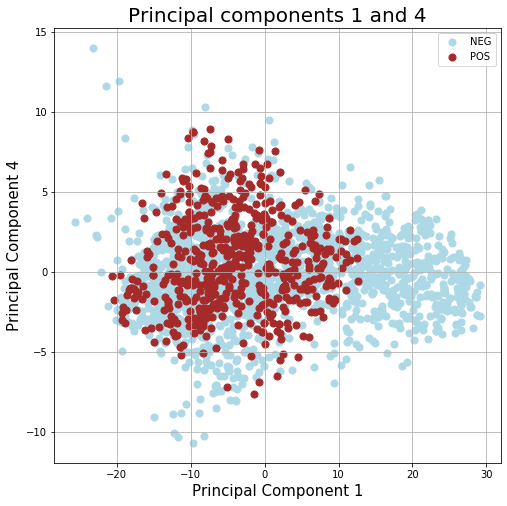

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('Principal components 1 and 4', fontsize = 20)
targets = ['NEG', 'POS']
colors = ['lightblue', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gram'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

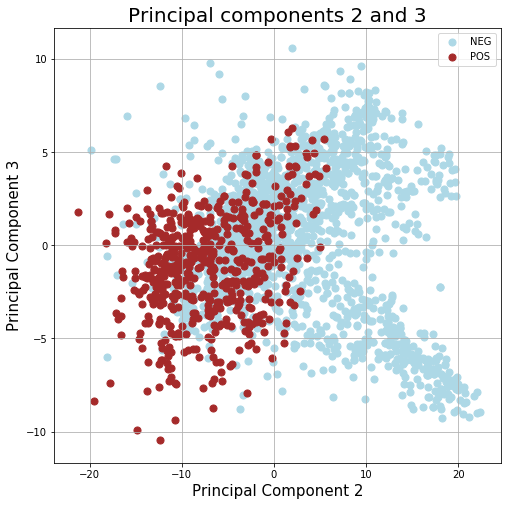

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('Principal components 2 and 3', fontsize = 20)
targets = ['NEG', 'POS']
colors = ['lightblue', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gram'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

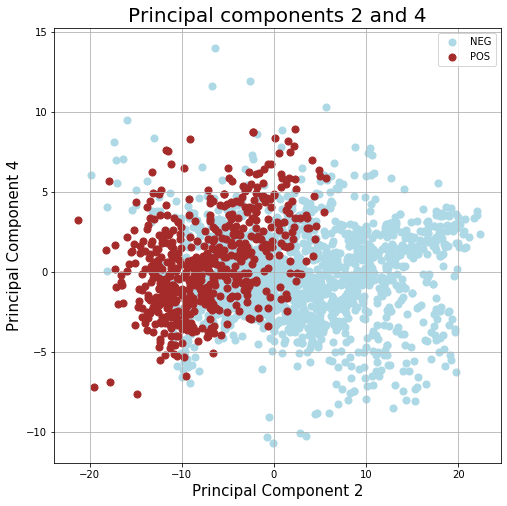

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('Principal components 2 and 4', fontsize = 20)
targets = ['NEG', 'POS']
colors = ['lightblue', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gram'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

On voit donc ici qu'il y a bien une différence entre les deux types de variables.
Nous allons donc regarder quelles sont les variables qui influent le plus sur les 4 premières composantes principales

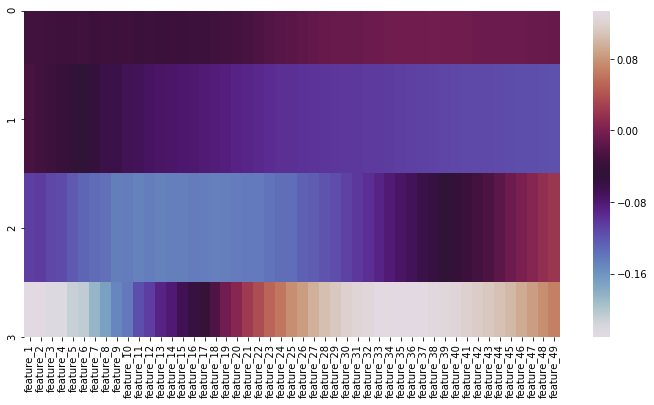

In [13]:
map= pd.DataFrame(res_acp.components_[0:4,1:50],columns=list(data.columns.values)[1:50])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

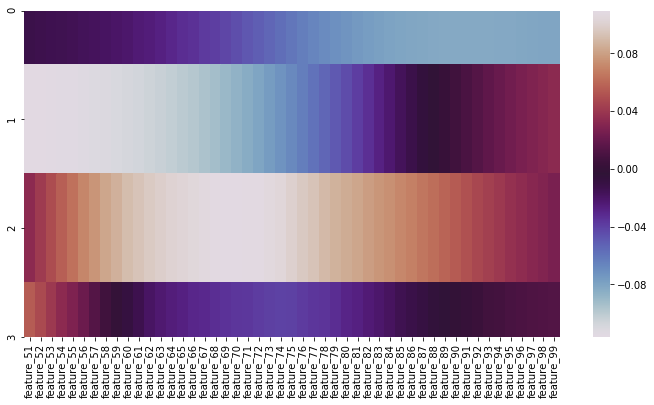

In [16]:
map= pd.DataFrame(res_acp.components_[0:4,51:100],columns=list(data.columns.values)[51:100])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

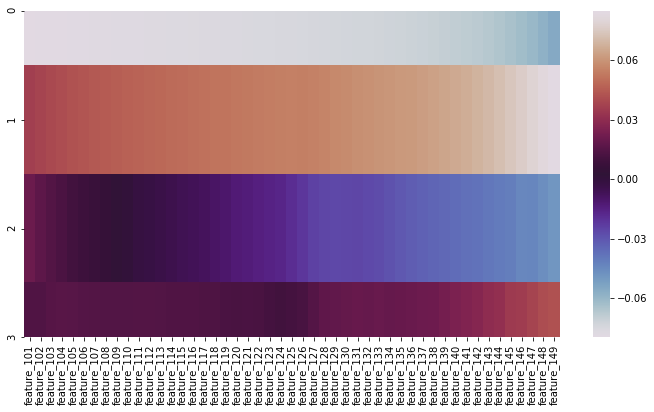

In [17]:
map= pd.DataFrame(res_acp.components_[0:4,101:150],columns=list(data.columns.values)[101:150])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

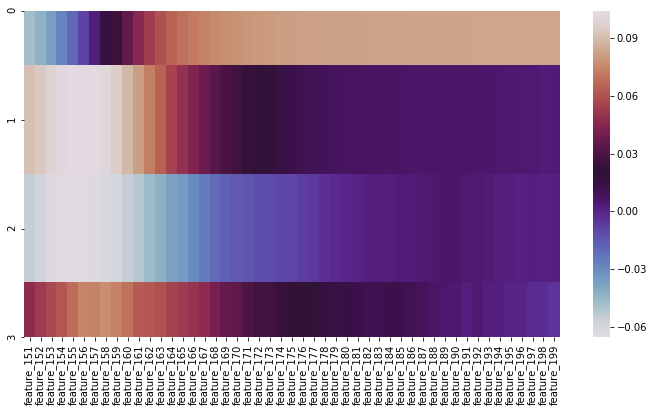

In [18]:
map= pd.DataFrame(res_acp.components_[0:4,151:200],columns=list(data.columns.values)[151:200])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

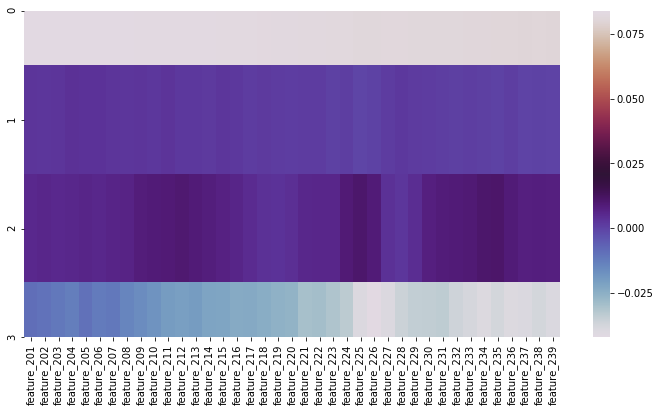

In [19]:
map= pd.DataFrame(res_acp.components_[0:4,201:240],columns=list(data.columns.values)[201:240])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

On voit dans ces graphiques la contribution des variables aux axes, c'est à dire que les couleurs montrent à quel point les variables ont été utilisées pour créer les 4 premiers axes. Cependant, il est quand même difficile d'identifier les variables car elles sont très nombreuses. 

On va donc récupérer les variables les plus influentes sur ces quatre premiers axes.

In [14]:
# On récupère la position des plus grandes valeurs de conributions pour les quatre premiers axes
pos1 = res_acp.components_[0,:].argsort()[-100:]
pos2 = res_acp.components_[1,:].argsort()[-50:]
pos3 = res_acp.components_[2,:].argsort()[-20:]
pos4 = res_acp.components_[3,:].argsort()[-10:]
posA = np.append(pos1, pos2)
posB = np.append(pos3, pos4)
pos = np.unique(np.append(posA, posB))

In [15]:
# On récupère le nom des variables qui ont les plus grosses contributions
varaxe1 = data.columns.values[pos1]
varaxe2 = data.columns.values[pos2]
varaxe3 = data.columns.values[pos3]
varaxe4 = data.columns.values[pos4]

In [16]:
# On créé un vecteur contenant les noms des variables contribuant le plus aux quatre axes
var2axes1 = np.append(varaxe1, varaxe2)
var2axes2 = np.append(varaxe3, varaxe4)
var4axes = np.append(var2axes1, var2axes2)

In [17]:
# On enlève les doublons
var4axes = np.unique(var4axes)

In [18]:
# On récupère les données de ces variables
Newdata = data.loc[:,var4axes]

On a donc nos nouvelles données qui contiennent moins de variables. On va maintenant essayer de construire un modèle en utilisant ces données. 

### 2. 

# Premier modèle avec la réduction des variables

On va commencer par séparer les données de 'train' et de 'test'. 

In [19]:
# On récupère les données 'Gram' et on les mets sous forme de 0 et 1
data_target = preprocessing.LabelBinarizer().fit_transform(data.Gram)

# On sépare les données en deux, 'train' et 'test' 
X_train, X_test, Y_train, Y_test = train_test_split(Newdata, data_target, test_size = 0.25, random_state = 1)

On va utiliser la méthode du random forest pour la classification. En effet, cette méthode s'appuit sur un algorithme de bagging basé sur les abres. Cette méthode est simple à paramétrer et performante sur beaucoup de problèmes statistiques. Cependant, elle a un coût calculatoire assez élevé. C'est pouquoi une réduction de variables comme nous avons fait plus haut peut être intéressante. On commence donc une construction de ce modèle avec 1500 arbres et les autres paramètres par défaut comme le critère de pureté "gini" qui est selectionné au détriment du critère d'"entropie" qui s'appuit pour sapart sur le gain d'information.

In [20]:
# On construit le modèle avec 1500 arbres
rf1 = RandomForestClassifier(n_estimators = 1500, random_state = 1)

# On crée le modèle avec les données de 'train'
rf1.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Maintenant que nous avons construit notre modèle sur les données d'entrainement, nous allons calculer les prédictions. Nous nous intéresserons également aux probabilités que chaque individu appartienne au groupe 0 ou 1 (c'est à dire NEG ou POS).

In [25]:
# On calcule les prédictions avec les données de tests pour les comparer aux données réelles
predictions1 = rf1.predict(X_test)

# On peut également voir les probabilités que chaque individu appartienne au groupe 0 ou 1
pred_proba1 = rf1.predict_proba(X_test)
np.round(pred_proba1, 3)

array([[0.744, 0.256],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [0.96 , 0.04 ],
       [0.998, 0.002]])

Sur ces données, on voit que les probabilités sont assez différentes à l'intérieur du couple. Il ne semble pas y avoir de difficulté à choisir entre les classes. Voyons le taux de bonnes prédictions sur les données de 'test' qui n'ont pas été utilisées pendant la création du modèle.

In [26]:
accuracy = accuracy_score(Y_test, predictions1)
print("Accuracy : %0.5f" % accuracy)

Accuracy : 0.96339


In [27]:
# Autre manière de calculer l'accuracy
test = 0
for i in range(len(predictions1)):
    if predictions1[i] == int(Y_test[i]):
        test = test + 1

print("Accuracy : %0.5f" % (test/len(predictions1)))

Accuracy : 0.96339


Nous avons un taux de bonne classification assez élevé. Nous allons voir à quoi ressemble la courbe ROC (Receiver Operating Characteristic) qui permet de connaître la performance d'un classificateur binaire. Elle se représente sur deux axes, le premier est (1 - specificité) et le second est la sensibilité. 

<function matplotlib.pyplot.show(*args, **kw)>

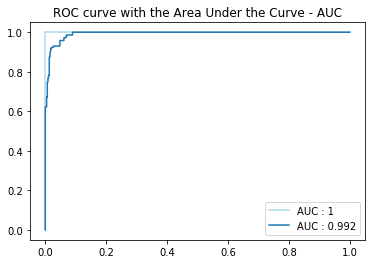

In [28]:
# fpr ou False Positive Rate = (1 - la sensibilité) 
# tpr ou True Positive Rate = spécificité
lines = [(0,0), (0,1), 'lightblue',
        (0,1), (1,1), 'lightblue']
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, pred_proba1[:,1])
plt.plot(*lines[0:3], label = 'AUC : 1')
plt.plot(*lines[3:7])
plt.plot(fpr1, tpr1, label='AUC : %0.3f' % sklearn.metrics.roc_auc_score(Y_test, pred_proba1[:,1]))
plt.legend(loc="lower right" )
plt.title("ROC curve with the Area Under the Curve - AUC")
plt.show

On a donc une courbe ROC très proche du modèle parfait (courbe bleue claire). La performance est l'aire sous la courbe. On a donc pour ce modèle une aire sous la courbe - AUC de 0.992 environ. C'est un résultat satisfaisant. On rappelle qu'un modèle dit 'nul', qui serait représenté par la fonction f(x) = x, aurait un AUC de 0.5. 

On va maintenant créer un second modèle qui utilisera toutes les variables disponibles dans le jeu de données initial.

# Deuxième modèle avec toutes les variables

On relance donc le même code avec toutes les variables et on obtient la courbe ROC suivante : 

In [29]:
# On récupère les données 'Gram' et on les mets sous forme de 0 et 1
data_target = preprocessing.LabelBinarizer().fit_transform(data.Gram)

# On sépare les données en deux, 'train' et 'test' 
X_trainall, X_testall, Y_trainall, Y_testall = train_test_split(data.drop(columns = 'Gram'), data_target, test_size = 0.25, random_state = 1)
# On construit le modèle avec 1500 arbres
rf2 = RandomForestClassifier(n_estimators = 1500, random_state = 1)

# On crée le modèle avec les données de 'train'
rf2.fit(X_trainall, Y_trainall.ravel())

# On calcule les prédictions avec les données de tests pour les comparer aux données réelles
predictions2 = rf2.predict(X_testall)

# On peut également voir les probabilités que chaque individu appartienne au groupe 0 ou 1
pred_proba2 = rf2.predict_proba(X_testall)

# On calcule l'indicateur 'accuracy' qui est le taux de bonnes prédictions
accuracy2 = accuracy_score(Y_testall, predictions2)
accuracy2

0.9733777038269551

<function matplotlib.pyplot.show(*args, **kw)>

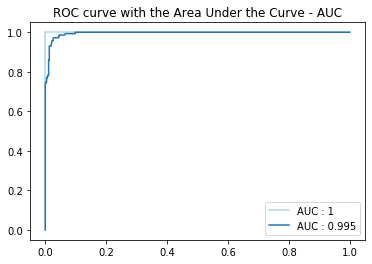

In [30]:
lines = [(0,0), (0,1), 'lightblue',
        (0,1), (1,1), 'lightblue']
fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_testall, pred_proba2[:,1])
plt.plot(*lines[0:3], label = 'AUC : 1')
plt.plot(*lines[3:7])
plt.plot(fpr2, tpr2,label='AUC : %0.3f' % sklearn.metrics.roc_auc_score(Y_testall, pred_proba2[:,1]))
plt.legend(loc="lower right" )
plt.title("ROC curve with the Area Under the Curve - AUC")
plt.show

On voit ici que la conclusion est la même qu'avec le premier modèle. Le modèle créé est très proche du modèle parfait. On va donc comparer les deux modèles obtenus.

# Comparaison deux modèles

<function matplotlib.pyplot.show(*args, **kw)>

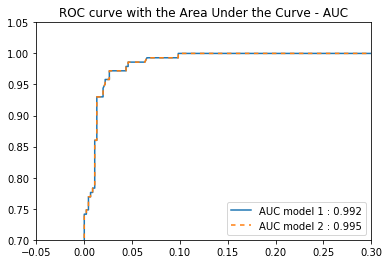

In [31]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, pred_proba2[:,1])
plt.plot(fpr1, tpr1,label='AUC model 1 : %0.3f' % sklearn.metrics.roc_auc_score(Y_test, pred_proba1[:,1]))
fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_testall, pred_proba2[:,1])
plt.plot(fpr2, tpr2,label='AUC model 2 : %0.3f' % sklearn.metrics.roc_auc_score(Y_testall, pred_proba2[:,1]), dashes=[3, 3])
plt.legend(loc="lower right" )
plt.ylim((0.7, 1.05))
plt.xlim((-0.05, 0.3))
plt.title("ROC curve with the Area Under the Curve - AUC")
plt.show

La courbe ROC ci dessus a été zoomé pour entrevoir une différence entre les deux modèles. Cependant, hormis la différence d'AUC à la troisième décimale, la différence n'est pas visible sur ce graphique. On prendra quand même le modèle avec le meilleur AUC.

### 3. 

Les classes étant assez déséquilibrées (77% de type 'NEG' et 23% de type 'POS'), on va donc s'intéresser à la courbe de  precision/recall qui permet de mesurer le succès des prédictions dans ce cas ci. 

Cette courbe montre le compromis entre la précision et le recall (ou sensibilité) à plusieurs seuils. Si l'aire sous la courbe est importante, nous sommes dans un cas ou la sensibilité et la précision sont élevées. C'est à dire que notre modèle a un taux de faux positifs et négatifs assez faible. Le modèle est dans ce cas précis.

On commence par utiliser la fonction 'cross_val_predict()'  pour avoir accès aux prédictions obtenues sur le jeu de données 

In [32]:
y_pred = cross_val_predict(rf2, X_trainall, Y_trainall.ravel(), cv=3)

On peut regarder le nombre d'instance 'Positive' et 'Negative' dans les données prédites.

In [33]:
collections.Counter(y_pred)

Counter({0: 1383, 1: 419})

In [34]:
from sklearn.metrics import precision_recall_curve
y_true = Y_testall
y_scores = rf2.predict_proba(X_testall)[:,1]

On calcule ensuite différents indicateurs pour pouvoir construire la courbe de 'Precision-Recall'

In [54]:
precision, recall, thresholds = precision_recall_curve(
    y_true, y_scores)

In [36]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_true, y_scores)

<function matplotlib.pyplot.show(*args, **kw)>

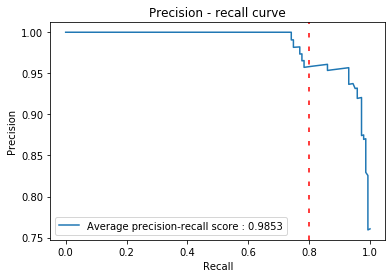

In [58]:
plt.plot(recall, precision, label = 'Average precision-recall score : %0.4f' %average_precision)
plt.title("Precision - recall curve")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc = "lower left")
plt.axvline(x=0.8, color = "red", dashes = [3,6])
plt.show

Nous pouvons voir dans le graphique ci-dessus que l'aire sous cette courbe est assez élevée. Nous pouvons aussi voir que l'"Average Precision-Recall Score" est de plus de 0.98. 

In [53]:
recall2 = recall[recall>0.8]
precision80 = precision[np.argmin(recall2)]
print("La précision lorsque la sensibilité est de 80 pourcent est de : %0.5f" % precision80)

La précision lorsque la sensibilité est de 80 pourcent est de : 0.95833


### 4.
Calculons maintenant les prédictions avec les données du fichier 'test-data.txt'.

In [39]:
PredictionsTest = rf2.predict(datatest)
collections.Counter(PredictionsTest)

Counter({1: 943, 0: 2187})

Maintenant que nous avons les prédictions sous forme de 1 et 0, il ne reste plus qu'à modifier pour avoir "POS" et "NEG" : 

In [45]:
PredictionsFinales = ["" for x in range(len(PredictionsTest))]
for i in range(len(PredictionsTest)):
    if PredictionsTest[i] == 0:
        PredictionsFinales[i] = "NEG"
    else:
        PredictionsFinales[i] = "POS"

pd.DataFrame(PredictionsFinales).T

,0,1,2,3,4,5,6,7,8,9,...,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129
0,POS,POS,NEG,POS,POS,POS,POS,POS,POS,POS,...,POS,POS,POS,POS,POS,POS,POS,POS,POS,POS


Il ne reste plus qu'à remplir le fichier préalablement créé des prédictions.

In [49]:
fichier = open("Fiches-Marthinet_exo-2.txt", 'w+')
fichier.write(str(PredictionsFinales))

21910